# loading the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

# loading the dataset in a dataframe using pandas

In [20]:
df=pd.read_csv('titanic.csv')

In [21]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.shape

(891, 12)

the dataset contains 891 rows and 12 columns, out of this 11 are independent fetaures and the survived column is the dependent variable. Based on analysis of the independent variables, a ML model will be build to predict a person will survive or not

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
775,776,0,3,"Myhrman, Mr. Pehr Fabian Oliver Malkolm",male,18.0,0,0,347078,7.7500,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S
403,404,0,3,"Hakkarainen, Mr. Pekka Pietari",male,28.0,1,0,STON/O2. 3101279,15.8500,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

observation: it can be seen that the age column contains 177 null values, cabin has 687 null values and embarked has 2 null values.

we will be replacing the null values using the imputational technique

# imputation

In [24]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.NaN,strategy="mean")

In [25]:
df["Age"]=imp.fit_transform(df["Age"].values.reshape(-1,1))

for replacing string values, stratgey used will be mode

In [19]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.NaN,strategy="most_frequent")

In [22]:
df["Cabin"]=imp.fit_transform(df["Cabin"].values.reshape(-1,1))
df["Embarked"]=imp.fit_transform(df["Embarked"].values.reshape(-1,1))

In [26]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

observation: the missing integer values have been replaced with the strategy mean and the string values have been replaced with the most frequent values

In [27]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [31]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

analysis: it contains 2 unique values and can be encoded

In [35]:
df["Ticket"].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

it contains large number of unique object values and thus can be dropped

In [38]:
df["Cabin"].unique()

array(['B96 B98', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

it contains large number of unique object values and thus can be dropped

In [36]:
df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

it contains 3 unique values and can be encoded

In [44]:
df.drop(["Name","Ticket","Cabin","PassengerId"],axis=1,inplace=True)

In [63]:
df.drop(["PassengerId"],axis=1,inplace=True)

In [64]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


# Label encoder

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
le=LabelEncoder()

In [47]:
list=["Sex","Embarked"]
for i in list:
    df[i]=le.fit_transform(df[i])

In [65]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [55]:
df["Embarked"].value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

In [58]:
le.inverse_transform([0,1,2])

array(['C', 'Q', 'S'], dtype=object)

C: 0
Q: 1
S: 2

In [59]:
df["Sex"].value_counts()

1    577
0    314
Name: Sex, dtype: int64

male: 1
female: 2

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int32  
dtypes: float64(2), int32(2), int64(5)
memory usage: 55.8 KB


# Descriptive staistics

it determines the central tendency of data like the mean, quartiles and the mode of each column

In [66]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


from the table it can be observed that skewness is present in multiple columns and thus needs to be removed

we will check for correlation between the columns 

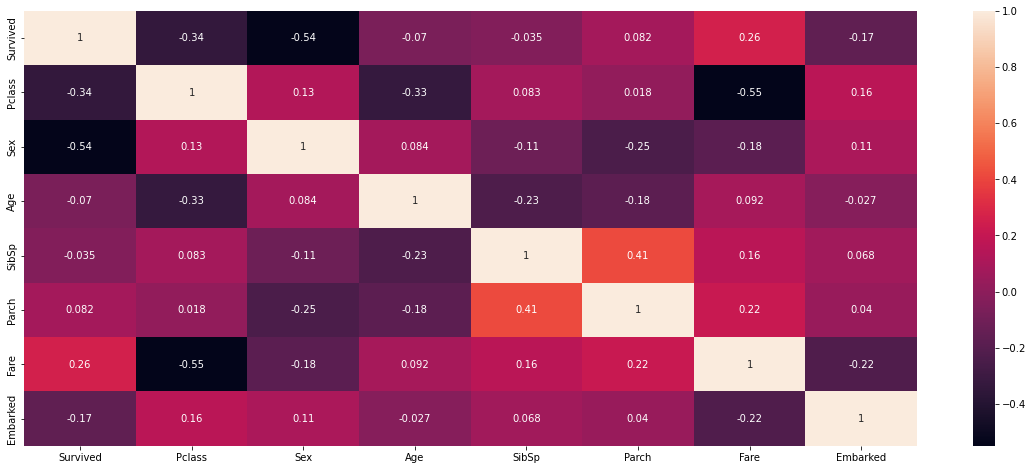

In [68]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

we can see that the survived column has positive correlation with columns Parch and fare
the target variable has negative corrleation with Pclass, Sex,Age,Embarked and SibSP

the sex column can be dropped because it has strong negative correlation with the target varibale or Survived column

In [69]:
df.drop("Sex",axis=1,inplace=True)

# Removal of outliers

In [84]:
from scipy.stats import zscore

In [85]:
z=np.abs(zscore(df))

In [86]:
z

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0.789272,0.827377,0.592481,0.432793,0.473674,0.502445,0.585954
1,1.266990,1.566107,0.638789,0.432793,0.473674,0.786845,1.942303
2,1.266990,0.827377,0.284663,0.474545,0.473674,0.488854,0.585954
3,1.266990,1.566107,0.407926,0.432793,0.473674,0.420730,0.585954
4,0.789272,0.827377,0.407926,0.474545,0.473674,0.486337,0.585954
...,...,...,...,...,...,...,...
886,0.789272,0.369365,0.207709,0.474545,0.473674,0.386671,0.585954
887,1.266990,1.566107,0.823344,0.474545,0.473674,0.044381,0.585954
888,0.789272,0.827377,0.000000,0.432793,2.008933,0.176263,0.585954
889,1.266990,1.566107,0.284663,0.474545,0.473674,0.044381,1.942303


In [87]:
np.where(z>3)

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
        119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
        299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
        527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
        689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
        824, 846, 850, 851, 858, 863, 885], dtype=int64),
 array([4, 3, 4, 5, 3, 3, 3, 3, 4, 5, 2, 2, 5, 3, 3, 3, 4, 3, 3, 3, 3, 3,
        5, 3, 3, 3, 5, 5, 3, 5, 4, 5, 5, 3, 4, 4, 5, 3, 2, 5, 3, 3, 5, 4,
        4, 2, 4, 2, 4, 5, 3, 3, 5, 5, 5, 5, 4, 5, 5, 2, 4, 5, 3, 3, 3, 3,
        3, 3, 2, 4, 3, 4], dtype=int64))

Survived       AxesSubplot(0.125,0.536818;0.168478x0.343182)
Pclass      AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Age         AxesSubplot(0.529348,0.536818;0.168478x0.343182)
SibSp       AxesSubplot(0.731522,0.536818;0.168478x0.343182)
Parch             AxesSubplot(0.125,0.125;0.168478x0.343182)
Fare           AxesSubplot(0.327174,0.125;0.168478x0.343182)
Embarked       AxesSubplot(0.529348,0.125;0.168478x0.343182)
dtype: object

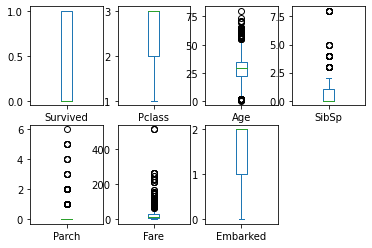

In [97]:
df.plot(kind="box",subplots=True,layout=(2,4))

observation: outliers are present and needs to be removed

In [98]:
df_new=df[(z<3).all(axis=1)]

In [99]:
df_new.shape

(820, 7)

number of rows of removed= 891-820= 71 

# removal of skewness

In [111]:
df=df_new

uniqvariate analysis

<AxesSubplot:ylabel='Density'>

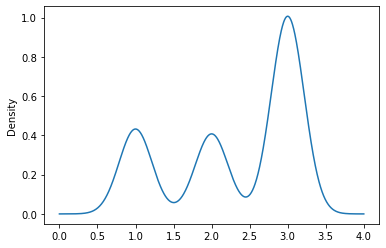

In [101]:
df["Pclass"].plot(kind='density')

observation: the column has multiple modes

<AxesSubplot:xlabel='Pclass', ylabel='count'>

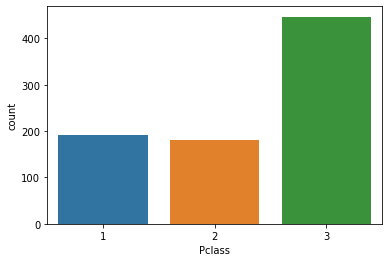

In [110]:
sns.countplot(df["Pclass"])

<AxesSubplot:ylabel='Density'>

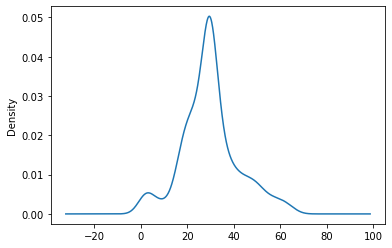

In [105]:
df["Age"].plot(kind='density')

observation: skewness is present

<AxesSubplot:ylabel='Density'>

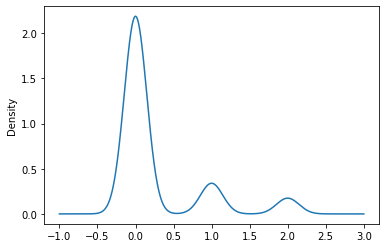

In [106]:
df["Parch"].plot(kind='density')

observation:skewness is present

<AxesSubplot:ylabel='Density'>

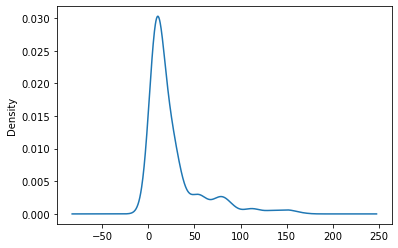

In [107]:
df["Fare"].plot(kind='density')

observation:skewness is present

<AxesSubplot:ylabel='Density'>

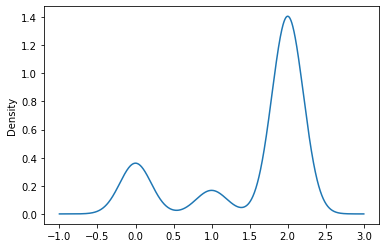

In [108]:
df["Embarked"].plot(kind='density')

observation:skewness is present

before removal of skewness, the dependent and the independent features need to be separated

In [223]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
0,0,3,22.000000,1,0,7.2500,2
1,1,1,38.000000,1,0,71.2833,0
2,1,3,26.000000,0,0,7.9250,2
3,1,1,35.000000,1,0,53.1000,2
4,0,3,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,2
887,1,1,19.000000,0,0,30.0000,2
888,0,3,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [237]:
x=df.iloc[:,1:]

In [238]:
x

,Pclass,Age,SibSp,Parch,Fare,Embarked
0,3,22.000000,1,0,7.2500,2
1,1,38.000000,1,0,71.2833,0
2,3,26.000000,0,0,7.9250,2
3,1,35.000000,1,0,53.1000,2
4,3,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,2
887,1,19.000000,0,0,30.0000,2
888,3,29.699118,1,2,23.4500,2
889,1,26.000000,0,0,30.0000,0


In [121]:
y=df.iloc[:,0:1]

In [122]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [141]:
x.skew().sort_values()

Embarked   -1.277386
Pclass     -0.632242
Age         0.318314
SibSp       1.979577
Parch       2.122629
Fare        2.318761
dtype: float64

observation: in the dataset, Pclass, Parch, Embarked and SibSp are categorical columns and therefore their skewness cannot be removed, so we will remove skewness of only the fare column. 

In [232]:
x.dtypes

Pclass        int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

<AxesSubplot:xlabel='Age', ylabel='Density'>

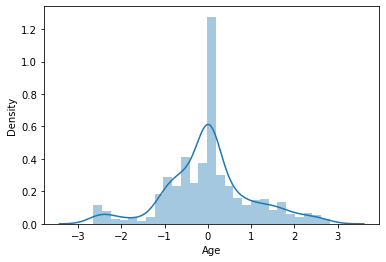

In [195]:
sns.distplot(x_new["Age"])

<AxesSubplot:xlabel='SibSp', ylabel='Density'>

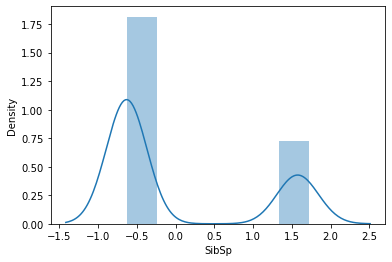

In [197]:
sns.distplot(x_new["SibSp"])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

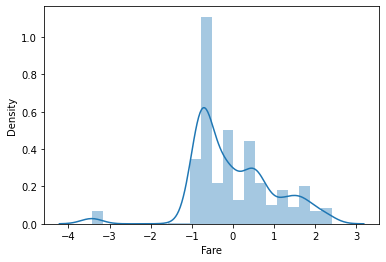

In [204]:
sns.distplot(x_new["Fare"])

<AxesSubplot:xlabel='Embarked', ylabel='Density'>

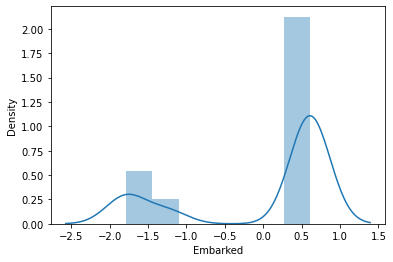

In [205]:
sns.distplot(x_new["Embarked"])

# Scaling of data

In [245]:
from sklearn.preprocessing import StandardScaler

In [246]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [247]:
x.mean()

1.4441925523579274e-17

In [253]:
dfx=pd.DataFrame(data=x)

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
      dtype=object)

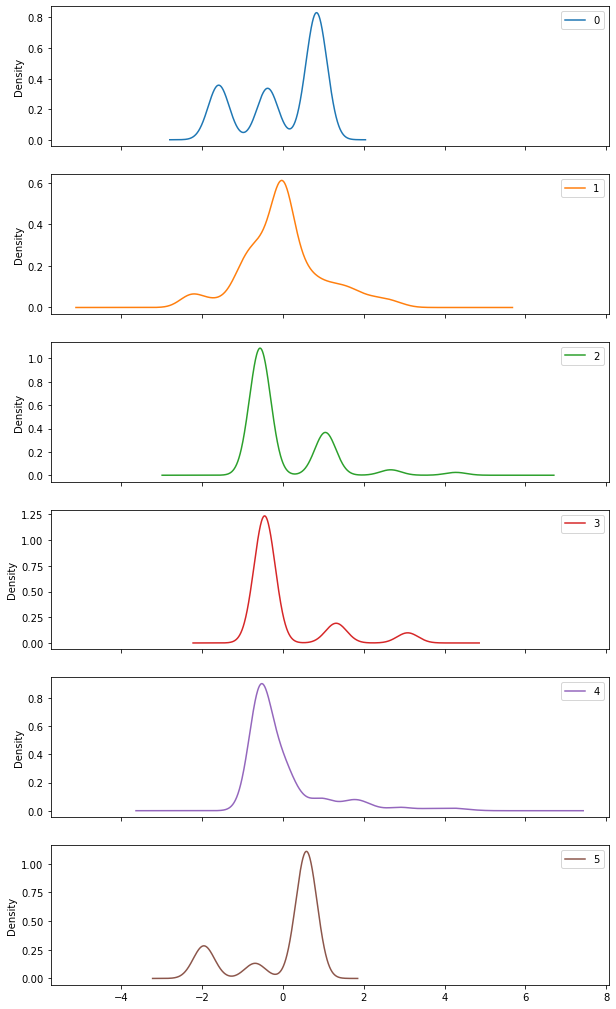

In [257]:
dfx.plot(kind='density',subplots=True,figsize=(10,18))

# splitting of train and test data

In [259]:
from sklearn.model_selection import train_test_split

In [276]:
x_train,x_test,y_train,y_test=train_test_split(dfx,y,test_size=0.20,random_state=42)

In [277]:
x_train.shape

(656, 6)

In [278]:
x_test.shape

(164, 6)

In [279]:
y_train.shape

(656, 1)

In [280]:
y_test.shape

(164, 1)

In [281]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

determination of the random state

In [295]:
def model_selection(instance):
    maxacc=0
    rs=0
    for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(dfx,y,random_state=i,test_size=0.20)
        instance.fit(x_train,y_train)
        instance.score(x_train,y_train)
        pred_train=instance.predict(x_train)
        pred=instance.predict(x_test)
        if((accuracy_score(y_test,pred))>maxacc):
            maxacc=accuracy_score(y_test,pred)
            rs=i
        print("Accuracy score:--",accuracy_score(y_test,pred))
        print("Confusion matrix:--", confusion_matrix(y_test,pred))
        print("classification report:--", classification_report(y_test,pred))
        print("\n")
    print("Max accuracy at random state",rs, "=",maxacc)

In [296]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
model_selection(lg)

Accuracy score:-- 0.6829268292682927
Confusion matrix:-- [[79 19]
 [33 33]]
classification report:--               precision    recall  f1-score   support

           0       0.71      0.81      0.75        98
           1       0.63      0.50      0.56        66

    accuracy                           0.68       164
   macro avg       0.67      0.65      0.66       164
weighted avg       0.68      0.68      0.67       164



Accuracy score:-- 0.7073170731707317
Confusion matrix:-- [[90 13]
 [35 26]]
classification report:--               precision    recall  f1-score   support

           0       0.72      0.87      0.79       103
           1       0.67      0.43      0.52        61

    accuracy                           0.71       164
   macro avg       0.69      0.65      0.65       164
weighted avg       0.70      0.71      0.69       164



Accuracy score:-- 0.7378048780487805
Confusion matrix:-- [[95 10]
 [33 26]]
classification report:--               precision    recall  f1-s

Accuracy score:-- 0.676829268292683
Confusion matrix:-- [[78 22]
 [31 33]]
classification report:--               precision    recall  f1-score   support

           0       0.72      0.78      0.75       100
           1       0.60      0.52      0.55        64

    accuracy                           0.68       164
   macro avg       0.66      0.65      0.65       164
weighted avg       0.67      0.68      0.67       164



Accuracy score:-- 0.6646341463414634
Confusion matrix:-- [[85 12]
 [43 24]]
classification report:--               precision    recall  f1-score   support

           0       0.66      0.88      0.76        97
           1       0.67      0.36      0.47        67

    accuracy                           0.66       164
   macro avg       0.67      0.62      0.61       164
weighted avg       0.67      0.66      0.64       164



Accuracy score:-- 0.676829268292683
Confusion matrix:-- [[79 16]
 [37 32]]
classification report:--               precision    recall  f1-sco

Confusion matrix:-- [[72 21]
 [36 35]]
classification report:--               precision    recall  f1-score   support

           0       0.67      0.77      0.72        93
           1       0.62      0.49      0.55        71

    accuracy                           0.65       164
   macro avg       0.65      0.63      0.63       164
weighted avg       0.65      0.65      0.64       164



Accuracy score:-- 0.7012195121951219
Confusion matrix:-- [[83 17]
 [32 32]]
classification report:--               precision    recall  f1-score   support

           0       0.72      0.83      0.77       100
           1       0.65      0.50      0.57        64

    accuracy                           0.70       164
   macro avg       0.69      0.67      0.67       164
weighted avg       0.69      0.70      0.69       164



Accuracy score:-- 0.6829268292682927
Confusion matrix:-- [[86 11]
 [41 26]]
classification report:--               precision    recall  f1-score   support

           0       0.

Accuracy score:-- 0.6829268292682927
Confusion matrix:-- [[77 23]
 [29 35]]
classification report:--               precision    recall  f1-score   support

           0       0.73      0.77      0.75       100
           1       0.60      0.55      0.57        64

    accuracy                           0.68       164
   macro avg       0.66      0.66      0.66       164
weighted avg       0.68      0.68      0.68       164



Accuracy score:-- 0.6463414634146342
Confusion matrix:-- [[75 21]
 [37 31]]
classification report:--               precision    recall  f1-score   support

           0       0.67      0.78      0.72        96
           1       0.60      0.46      0.52        68

    accuracy                           0.65       164
   macro avg       0.63      0.62      0.62       164
weighted avg       0.64      0.65      0.64       164



Accuracy score:-- 0.7073170731707317
Confusion matrix:-- [[84 18]
 [30 32]]
classification report:--               precision    recall  f1-s

Confusion matrix:-- [[89 17]
 [26 32]]
classification report:--               precision    recall  f1-score   support

           0       0.77      0.84      0.81       106
           1       0.65      0.55      0.60        58

    accuracy                           0.74       164
   macro avg       0.71      0.70      0.70       164
weighted avg       0.73      0.74      0.73       164



Accuracy score:-- 0.7378048780487805
Confusion matrix:-- [[86 16]
 [27 35]]
classification report:--               precision    recall  f1-score   support

           0       0.76      0.84      0.80       102
           1       0.69      0.56      0.62        62

    accuracy                           0.74       164
   macro avg       0.72      0.70      0.71       164
weighted avg       0.73      0.74      0.73       164



Accuracy score:-- 0.7012195121951219
Confusion matrix:-- [[86 15]
 [34 29]]
classification report:--               precision    recall  f1-score   support

           0       0.

In [291]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
model_selection(gnb)


Accuracy score:-- 0.6585365853658537
Confusion matrix:-- [[78 20]
 [36 30]]
classification report:--               precision    recall  f1-score   support

           0       0.68      0.80      0.74        98
           1       0.60      0.45      0.52        66

    accuracy                           0.66       164
   macro avg       0.64      0.63      0.63       164
weighted avg       0.65      0.66      0.65       164



Accuracy score:-- 0.6890243902439024
Confusion matrix:-- [[85 18]
 [33 28]]
classification report:--               precision    recall  f1-score   support

           0       0.72      0.83      0.77       103
           1       0.61      0.46      0.52        61

    accuracy                           0.69       164
   macro avg       0.66      0.64      0.65       164
weighted avg       0.68      0.69      0.68       164



Accuracy score:-- 0.7195121951219512
Confusion matrix:-- [[93 12]
 [34 25]]
classification report:--               precision    recall  f1-s

Accuracy score:-- 0.6524390243902439
Confusion matrix:-- [[82 15]
 [42 25]]
classification report:--               precision    recall  f1-score   support

           0       0.66      0.85      0.74        97
           1       0.62      0.37      0.47        67

    accuracy                           0.65       164
   macro avg       0.64      0.61      0.60       164
weighted avg       0.65      0.65      0.63       164



Accuracy score:-- 0.6524390243902439
Confusion matrix:-- [[75 20]
 [37 32]]
classification report:--               precision    recall  f1-score   support

           0       0.67      0.79      0.72        95
           1       0.62      0.46      0.53        69

    accuracy                           0.65       164
   macro avg       0.64      0.63      0.63       164
weighted avg       0.65      0.65      0.64       164



Accuracy score:-- 0.6951219512195121
Confusion matrix:-- [[80 11]
 [39 34]]
classification report:--               precision    recall  f1-s

Accuracy score:-- 0.676829268292683
Confusion matrix:-- [[85 15]
 [38 26]]
classification report:--               precision    recall  f1-score   support

           0       0.69      0.85      0.76       100
           1       0.63      0.41      0.50        64

    accuracy                           0.68       164
   macro avg       0.66      0.63      0.63       164
weighted avg       0.67      0.68      0.66       164



Accuracy score:-- 0.7012195121951219
Confusion matrix:-- [[87 17]
 [32 28]]
classification report:--               precision    recall  f1-score   support

           0       0.73      0.84      0.78       104
           1       0.62      0.47      0.53        60

    accuracy                           0.70       164
   macro avg       0.68      0.65      0.66       164
weighted avg       0.69      0.70      0.69       164



Accuracy score:-- 0.6890243902439024
Confusion matrix:-- [[80 10]
 [41 33]]
classification report:--               precision    recall  f1-sc

Confusion matrix:-- [[85 16]
 [35 28]]
classification report:--               precision    recall  f1-score   support

           0       0.71      0.84      0.77       101
           1       0.64      0.44      0.52        63

    accuracy                           0.69       164
   macro avg       0.67      0.64      0.65       164
weighted avg       0.68      0.69      0.67       164



Accuracy score:-- 0.774390243902439
Confusion matrix:-- [[100  10]
 [ 27  27]]
classification report:--               precision    recall  f1-score   support

           0       0.79      0.91      0.84       110
           1       0.73      0.50      0.59        54

    accuracy                           0.77       164
   macro avg       0.76      0.70      0.72       164
weighted avg       0.77      0.77      0.76       164



Accuracy score:-- 0.6829268292682927
Confusion matrix:-- [[77 15]
 [37 35]]
classification report:--               precision    recall  f1-score   support

           0      

In [292]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
model_selection(knn)

Accuracy score:-- 0.6524390243902439
Confusion matrix:-- [[70 28]
 [29 37]]
classification report:--               precision    recall  f1-score   support

           0       0.71      0.71      0.71        98
           1       0.57      0.56      0.56        66

    accuracy                           0.65       164
   macro avg       0.64      0.64      0.64       164
weighted avg       0.65      0.65      0.65       164



Accuracy score:-- 0.6707317073170732
Confusion matrix:-- [[84 19]
 [35 26]]
classification report:--               precision    recall  f1-score   support

           0       0.71      0.82      0.76       103
           1       0.58      0.43      0.49        61

    accuracy                           0.67       164
   macro avg       0.64      0.62      0.62       164
weighted avg       0.66      0.67      0.66       164



Accuracy score:-- 0.676829268292683
Confusion matrix:-- [[86 19]
 [34 25]]
classification report:--               precision    recall  f1-sc

Accuracy score:-- 0.6585365853658537
Confusion matrix:-- [[79 27]
 [29 29]]
classification report:--               precision    recall  f1-score   support

           0       0.73      0.75      0.74       106
           1       0.52      0.50      0.51        58

    accuracy                           0.66       164
   macro avg       0.62      0.62      0.62       164
weighted avg       0.66      0.66      0.66       164



Accuracy score:-- 0.6646341463414634
Confusion matrix:-- [[81 23]
 [32 28]]
classification report:--               precision    recall  f1-score   support

           0       0.72      0.78      0.75       104
           1       0.55      0.47      0.50        60

    accuracy                           0.66       164
   macro avg       0.63      0.62      0.63       164
weighted avg       0.66      0.66      0.66       164



Accuracy score:-- 0.6951219512195121
Confusion matrix:-- [[76 17]
 [33 38]]
classification report:--               precision    recall  f1-s

Accuracy score:-- 0.7195121951219512
Confusion matrix:-- [[79 23]
 [23 39]]
classification report:--               precision    recall  f1-score   support

           0       0.77      0.77      0.77       102
           1       0.63      0.63      0.63        62

    accuracy                           0.72       164
   macro avg       0.70      0.70      0.70       164
weighted avg       0.72      0.72      0.72       164



Accuracy score:-- 0.6585365853658537
Confusion matrix:-- [[77 27]
 [29 31]]
classification report:--               precision    recall  f1-score   support

           0       0.73      0.74      0.73       104
           1       0.53      0.52      0.53        60

    accuracy                           0.66       164
   macro avg       0.63      0.63      0.63       164
weighted avg       0.66      0.66      0.66       164



Accuracy score:-- 0.6585365853658537
Confusion matrix:-- [[75 22]
 [34 33]]
classification report:--               precision    recall  f1-s

Accuracy score:-- 0.6585365853658537
Confusion matrix:-- [[68 26]
 [30 40]]
classification report:--               precision    recall  f1-score   support

           0       0.69      0.72      0.71        94
           1       0.61      0.57      0.59        70

    accuracy                           0.66       164
   macro avg       0.65      0.65      0.65       164
weighted avg       0.66      0.66      0.66       164



Accuracy score:-- 0.7560975609756098
Confusion matrix:-- [[81 23]
 [17 43]]
classification report:--               precision    recall  f1-score   support

           0       0.83      0.78      0.80       104
           1       0.65      0.72      0.68        60

    accuracy                           0.76       164
   macro avg       0.74      0.75      0.74       164
weighted avg       0.76      0.76      0.76       164



Accuracy score:-- 0.6707317073170732
Confusion matrix:-- [[79 25]
 [29 31]]
classification report:--               precision    recall  f1-s

Accuracy score:-- 0.7073170731707317
Confusion matrix:-- [[78 22]
 [26 38]]
classification report:--               precision    recall  f1-score   support

           0       0.75      0.78      0.76       100
           1       0.63      0.59      0.61        64

    accuracy                           0.71       164
   macro avg       0.69      0.69      0.69       164
weighted avg       0.70      0.71      0.71       164



Accuracy score:-- 0.6524390243902439
Confusion matrix:-- [[72 24]
 [33 35]]
classification report:--               precision    recall  f1-score   support

           0       0.69      0.75      0.72        96
           1       0.59      0.51      0.55        68

    accuracy                           0.65       164
   macro avg       0.64      0.63      0.63       164
weighted avg       0.65      0.65      0.65       164



Accuracy score:-- 0.6280487804878049
Confusion matrix:-- [[76 20]
 [41 27]]
classification report:--               precision    recall  f1-s

In [322]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model_selection(rf)

Accuracy score:-- 0.7012195121951219
Confusion matrix:-- [[73 25]
 [24 42]]
classification report:--               precision    recall  f1-score   support

           0       0.75      0.74      0.75        98
           1       0.63      0.64      0.63        66

    accuracy                           0.70       164
   macro avg       0.69      0.69      0.69       164
weighted avg       0.70      0.70      0.70       164



Accuracy score:-- 0.6890243902439024
Confusion matrix:-- [[78 25]
 [26 35]]
classification report:--               precision    recall  f1-score   support

           0       0.75      0.76      0.75       103
           1       0.58      0.57      0.58        61

    accuracy                           0.69       164
   macro avg       0.67      0.67      0.67       164
weighted avg       0.69      0.69      0.69       164



Accuracy score:-- 0.7073170731707317
Confusion matrix:-- [[87 18]
 [30 29]]
classification report:--               precision    recall  f1-s

Accuracy score:-- 0.6707317073170732
Confusion matrix:-- [[74 27]
 [27 36]]
classification report:--               precision    recall  f1-score   support

           0       0.73      0.73      0.73       101
           1       0.57      0.57      0.57        63

    accuracy                           0.67       164
   macro avg       0.65      0.65      0.65       164
weighted avg       0.67      0.67      0.67       164



Accuracy score:-- 0.6402439024390244
Confusion matrix:-- [[72 29]
 [30 33]]
classification report:--               precision    recall  f1-score   support

           0       0.71      0.71      0.71       101
           1       0.53      0.52      0.53        63

    accuracy                           0.64       164
   macro avg       0.62      0.62      0.62       164
weighted avg       0.64      0.64      0.64       164



Accuracy score:-- 0.6585365853658537
Confusion matrix:-- [[81 25]
 [31 27]]
classification report:--               precision    recall  f1-s

Confusion matrix:-- [[66 36]
 [22 40]]
classification report:--               precision    recall  f1-score   support

           0       0.75      0.65      0.69       102
           1       0.53      0.65      0.58        62

    accuracy                           0.65       164
   macro avg       0.64      0.65      0.64       164
weighted avg       0.67      0.65      0.65       164



Accuracy score:-- 0.6463414634146342
Confusion matrix:-- [[72 33]
 [25 34]]
classification report:--               precision    recall  f1-score   support

           0       0.74      0.69      0.71       105
           1       0.51      0.58      0.54        59

    accuracy                           0.65       164
   macro avg       0.62      0.63      0.63       164
weighted avg       0.66      0.65      0.65       164



Accuracy score:-- 0.725609756097561
Confusion matrix:-- [[85 19]
 [26 34]]
classification report:--               precision    recall  f1-score   support

           0       0.7

Accuracy score:-- 0.7195121951219512
Confusion matrix:-- [[77 23]
 [23 41]]
classification report:--               precision    recall  f1-score   support

           0       0.77      0.77      0.77       100
           1       0.64      0.64      0.64        64

    accuracy                           0.72       164
   macro avg       0.71      0.71      0.71       164
weighted avg       0.72      0.72      0.72       164



Accuracy score:-- 0.7012195121951219
Confusion matrix:-- [[81 18]
 [31 34]]
classification report:--               precision    recall  f1-score   support

           0       0.72      0.82      0.77        99
           1       0.65      0.52      0.58        65

    accuracy                           0.70       164
   macro avg       0.69      0.67      0.67       164
weighted avg       0.70      0.70      0.69       164



Accuracy score:-- 0.6951219512195121
Confusion matrix:-- [[79 23]
 [27 35]]
classification report:--               precision    recall  f1-s

Accuracy score:-- 0.7682926829268293
Confusion matrix:-- [[83 22]
 [16 43]]
classification report:--               precision    recall  f1-score   support

           0       0.84      0.79      0.81       105
           1       0.66      0.73      0.69        59

    accuracy                           0.77       164
   macro avg       0.75      0.76      0.75       164
weighted avg       0.77      0.77      0.77       164



Accuracy score:-- 0.6890243902439024
Confusion matrix:-- [[71 25]
 [26 42]]
classification report:--               precision    recall  f1-score   support

           0       0.73      0.74      0.74        96
           1       0.63      0.62      0.62        68

    accuracy                           0.69       164
   macro avg       0.68      0.68      0.68       164
weighted avg       0.69      0.69      0.69       164



Accuracy score:-- 0.7073170731707317
Confusion matrix:-- [[79 22]
 [26 37]]
classification report:--               precision    recall  f1-s

In [321]:
from sklearn.svm import SVC
svc=SVC()
model_selection(svc)

Accuracy score:-- 0.6646341463414634
Confusion matrix:-- [[77 21]
 [34 32]]
classification report:--               precision    recall  f1-score   support

           0       0.69      0.79      0.74        98
           1       0.60      0.48      0.54        66

    accuracy                           0.66       164
   macro avg       0.65      0.64      0.64       164
weighted avg       0.66      0.66      0.66       164



Accuracy score:-- 0.7134146341463414
Confusion matrix:-- [[89 14]
 [33 28]]
classification report:--               precision    recall  f1-score   support

           0       0.73      0.86      0.79       103
           1       0.67      0.46      0.54        61

    accuracy                           0.71       164
   macro avg       0.70      0.66      0.67       164
weighted avg       0.71      0.71      0.70       164



Accuracy score:-- 0.7439024390243902
Confusion matrix:-- [[97  8]
 [34 25]]
classification report:--               precision    recall  f1-s

Accuracy score:-- 0.7134146341463414
Confusion matrix:-- [[88 13]
 [34 29]]
classification report:--               precision    recall  f1-score   support

           0       0.72      0.87      0.79       101
           1       0.69      0.46      0.55        63

    accuracy                           0.71       164
   macro avg       0.71      0.67      0.67       164
weighted avg       0.71      0.71      0.70       164



Accuracy score:-- 0.676829268292683
Confusion matrix:-- [[84 17]
 [36 27]]
classification report:--               precision    recall  f1-score   support

           0       0.70      0.83      0.76       101
           1       0.61      0.43      0.50        63

    accuracy                           0.68       164
   macro avg       0.66      0.63      0.63       164
weighted avg       0.67      0.68      0.66       164



Accuracy score:-- 0.6890243902439024
Confusion matrix:-- [[91 15]
 [36 22]]
classification report:--               precision    recall  f1-sc

classification report:--               precision    recall  f1-score   support

           0       0.71      0.75      0.73       102
           1       0.55      0.50      0.53        62

    accuracy                           0.66       164
   macro avg       0.63      0.63      0.63       164
weighted avg       0.65      0.66      0.65       164



Accuracy score:-- 0.6646341463414634
Confusion matrix:-- [[86 19]
 [36 23]]
classification report:--               precision    recall  f1-score   support

           0       0.70      0.82      0.76       105
           1       0.55      0.39      0.46        59

    accuracy                           0.66       164
   macro avg       0.63      0.60      0.61       164
weighted avg       0.65      0.66      0.65       164



Accuracy score:-- 0.7621951219512195
Confusion matrix:-- [[92 12]
 [27 33]]
classification report:--               precision    recall  f1-score   support

           0       0.77      0.88      0.83       104
      

Accuracy score:-- 0.7560975609756098
Confusion matrix:-- [[92  8]
 [32 32]]
classification report:--               precision    recall  f1-score   support

           0       0.74      0.92      0.82       100
           1       0.80      0.50      0.62        64

    accuracy                           0.76       164
   macro avg       0.77      0.71      0.72       164
weighted avg       0.76      0.76      0.74       164



Accuracy score:-- 0.6829268292682927
Confusion matrix:-- [[84 15]
 [37 28]]
classification report:--               precision    recall  f1-score   support

           0       0.69      0.85      0.76        99
           1       0.65      0.43      0.52        65

    accuracy                           0.68       164
   macro avg       0.67      0.64      0.64       164
weighted avg       0.68      0.68      0.67       164



Accuracy score:-- 0.725609756097561
Confusion matrix:-- [[90 12]
 [33 29]]
classification report:--               precision    recall  f1-sc

Accuracy score:-- 0.7804878048780488
Confusion matrix:-- [[94 11]
 [25 34]]
classification report:--               precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.76      0.58      0.65        59

    accuracy                           0.78       164
   macro avg       0.77      0.74      0.75       164
weighted avg       0.78      0.78      0.77       164



Accuracy score:-- 0.676829268292683
Confusion matrix:-- [[80 16]
 [37 31]]
classification report:--               precision    recall  f1-score   support

           0       0.68      0.83      0.75        96
           1       0.66      0.46      0.54        68

    accuracy                           0.68       164
   macro avg       0.67      0.64      0.65       164
weighted avg       0.67      0.68      0.66       164



Accuracy score:-- 0.725609756097561
Confusion matrix:-- [[88 13]
 [32 31]]
classification report:--               precision    recall  f1-sco

# CV Score

In [297]:
from sklearn.model_selection import cross_val_score

In [298]:
score=cross_val_score(lg,dfx,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.58536585 0.67073171 0.75609756 0.75609756 0.71341463]
0.6963414634146342
0.06388195538394535


In [310]:
score=cross_val_score(rf,dfx,y,cv=6)
print(score)
print(score.mean())
print(score.std())

[0.66423358 0.69343066 0.69343066 0.7080292  0.68382353 0.67647059]
0.6865697008730499
0.013922951034367559


In [304]:
score=cross_val_score(svc,dfx,y,cv=7)
print(score)
print(score.mean())
print(score.std())

[0.61016949 0.70940171 0.67521368 0.76068376 0.76068376 0.72649573
 0.76068376]
0.7147616978125452
0.05209400868681555


observation: the performance of the model is best with random forest classifier, with accuracy=79.8% and with cv value=6, accuracy score is 68.65 %

# Hyper parameter tuning

In [314]:
from sklearn.model_selection import GridSearchCV
dict={"max_features":['auto','sqrt','log2'],
      "max_depth":[2,4,5,6,7,8],
      "criterion":["gini","entropy"],
     "n_estimators":[100,200,300,400,500]}

In [315]:
gd=GridSearchCV(estimator=rf,param_grid=dict,cv=6)

In [316]:
gd.fit(dfx,y)

GridSearchCV(cv=6, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [317]:
gd.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 100}

In [318]:
gd.best_score_

0.7317339344496924

# Final model

In [319]:
dict={"max_features":['auto'],
      "max_depth":[8],
      "criterion":["entropy"],
     "n_estimators":[100]}

In [323]:
from sklearn.ensemble import RandomForestClassifier
x_train,x_test,y_train,y_test=train_test_split(dfx,y,random_state=65,test_size=0.20)
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

rf.score(x_train,y_train)
pred_train=rf.predict(x_train)
pred=rf.predict(x_test)
        
print("Accuracy score:--",accuracy_score(y_test,pred))
print("Confusion matrix:--", confusion_matrix(y_test,pred))
print("classification report:--", classification_report(y_test,pred))
print("\n")
    

Accuracy score:-- 0.7560975609756098
Confusion matrix:-- [[83 21]
 [19 41]]
classification report:--               precision    recall  f1-score   support

           0       0.81      0.80      0.81       104
           1       0.66      0.68      0.67        60

    accuracy                           0.76       164
   macro avg       0.74      0.74      0.74       164
weighted avg       0.76      0.76      0.76       164





# AUCROC score

In [326]:
from sklearn.metrics import roc_auc_score

In [327]:
fpr,tpr,thresholds=roc_curve(pred,y_test)
roc_auc=auc(fpr,tpr)

NameError: name 'roc_curve' is not defined

# saving the file

In [324]:
import pickle
filename="titanic.pkl"
pickle.dump(rf,open(filename,'wb'))